# PHYS 310 HW Problem
## Simulation of PHYS 211 M&M Experiment

+ 6 Colors: Yellow, Blue, Orange, Red, Green, and Blue
+ Assume 60 M&Ms in every bag
+ Assume equal probabilities (well mixed, large "reservoir")
+ Assume 24 students (bags) per section

<span style=" color:red">NOTE</span>: In this notebook I use the module `scipy.stats` for <em>all</em> statistics 
functions, including generation of random numbers. There are other modules with some overlapping functionality, e.g., the regular python `random` module, and the `scipy.random` module, but I do not use them here.  The `scipy.stats` module includes tools for a large number of distributions, it includes a large and growing set of statistical functions, and there is a unified class structure.  (And namespace issues are minimized.)  See https://docs.scipy.org/doc/scipy/reference/stats.html.

In [1]:
import scipy as sp
from scipy import stats

import matplotlib as mpl       # As of July 2017 Bucknell computers use v. 2.x 
import matplotlib.pyplot as plt

# Following is an Ipython magic command that puts figures in the  notebook.
# For figures in separate windows, comment out following line and uncomment
# the next line
# Must come before defaults are changed.
%matplotlib notebook
#%matplotlib

# As of Aug. 2017 reverting to 1.x defaults.
# In 2.x text.ustex requires dvipng, texlive-latex-extra, and texlive-fonts-recommended, 
# which don't seem to be universal
# See https://stackoverflow.com/questions/38906356/error-running-matplotlib-in-latex-type1cm?
mpl.style.use('classic')
        
# M.L. modifications of matplotlib defaults using syntax of v.2.0 
# More info at http://matplotlib.org/2.0.0/users/deflt_style_changes.html
# Changes can also be put in matplotlibrc file, or effected using mpl.rcParams[]
plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size

### Part 1

To get started, sample one bag of M&Ms, and count the numberof brown M&Ms.<br>
Do this by generating 60 random integers from the set 0,1,2,3,4,5, and 
let's say that "brown" = 5.

In [2]:
bag = sp.stats.randint.rvs(0,6,size = 60) # or sp.random.randint(0,6,60)
bag

array([1, 1, 1, 3, 2, 0, 4, 5, 4, 3, 1, 3, 5, 0, 5, 2, 5, 3, 2, 3, 3, 4, 2,
       3, 3, 4, 3, 3, 1, 2, 2, 1, 2, 5, 5, 3, 4, 1, 3, 4, 3, 0, 2, 0, 4, 1,
       0, 2, 0, 1, 1, 5, 4, 1, 0, 4, 1, 1, 0, 0])

- Count the number of each color in the bag using sp.bincount(bag).  The first element in the array is the number of occurences of 0 in "bag," the second element is the number of occurences of 1, etc.

In [3]:
sp.bincount(bag)

array([ 9, 13,  9, 13,  9,  7])

- For our "brown" = 5 choice, the number of brown M&Ms is the last element in the array returned by bincount, or sp.bincount(bag)[5].

In [4]:
sp.bincount(bag)[5]

7

- Now sample many bags
- Record number of brown M&Ms in each bag

In [5]:
# Long version of sampling many bags
nb = 24                     # number of bags 
data_section = sp.zeros(nb) # array in which to store data for a lab section
for i in range(nb):
    bag = sp.stats.randint.rvs(0,6,size=60)
    data_section[i] = sp.bincount(bag)[5]

In [6]:
# Concise version of sampling many bags
nb = 24            # number of bags
data_section = sp.array([sp.bincount(sp.stats.randint.rvs(0,6,size=60))[5] for i in range(nb)])
data_section

array([14, 13, 10, 16, 13, 11, 11,  7,  7, 10, 11, 13, 13,  6, 17,  5,  9,
        9, 12,  8,  6, 15, 13, 10])

In [7]:
sp.mean(data_section), sp.std(data_section), sp.std(data_section)/sp.sqrt(len(data_section))

(10.791666666666666, 3.1882488227168775, 0.65079856572379458)

#### Answer for Part 1, the results from a single lab section:
$\overline{N}_\text{section} = 9.9 \pm 0.6$ 

<IPython.core.display.Javascript object>


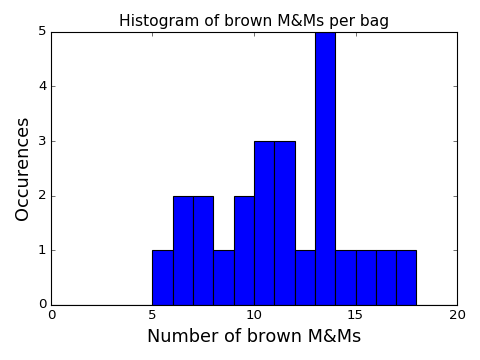

In [8]:
plt.figure(1)
nbins = 20
low = 0
high = 20
plt.hist(data_section,nbins,[low,high])
plt.xlim(0,20)
plt.title("Histogram of brown M&Ms per bag",fontsize=14)
plt.xlabel("Number of brown M&Ms")
plt.ylabel("Occurences")
plt.show()

### Part 2

#### Now we simulate data from 200 lab sections.

In [9]:
nb = 24    # Number of bags in a section
ns = 200   # Number of sections in class
data_class = sp.zeros(ns) # array for results from each section
for j in range(ns):
    data_section = sp.zeros(nb)     # array in which to store section data
    for i in range(nb):
        bag = sp.stats.randint.rvs(0,6,size=60)
        data_section[i] = sp.bincount(bag)[5]
    data_class[j] = sp.mean(data_section)

In [10]:
sp.mean(data_class), sp.std(data_class)

(9.9508333333333336, 0.58757032676003029)

The standard deviation of the section averages (0.62) is consistent with that predicted by the standard deviation of the mean determined from a single section (0.6).

For a more through comparision with the predictions of the central limit theorem (CLT) I will compare the histogram of section averages with the the normal distribution predicted by the CLT.  The average of the normal distribution is predicted to be 10, and the standard deviation is predicted to be $\sigma_\text{parent}/\sqrt{N}$, where $N$ is the number of bags in a section.

The parent distribution is a binomial distribution with n = 60, and p = 1/6.

In [11]:
sigmaP = sp.stats.binom.std(60,1/6.)
sigmaP

2.8867513459481291

This result is consistent with the observed experimental standard deviation from a single section.

When comparing the histogram with the normal distribution, we are really comparing the observed occurences in a bin with an integration of the probability distribution over finite interval:
$$ N_\text{section}\times \int_{x1}^{x2} p(x)\, dx \simeq N_\text{section} p(\overline{x})(x_2-x_1) $$
where $(x_2-x_1)$ is the binwidth.  (For wide bins it would be better to use the cdf rather than this approximation.)

<IPython.core.display.Javascript object>


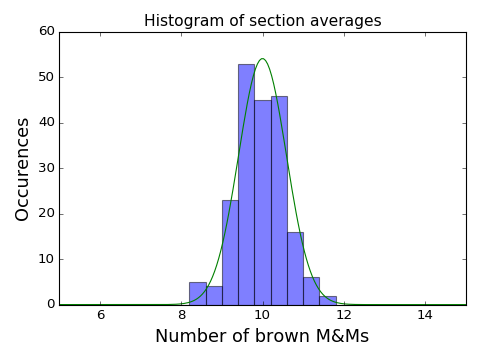

In [12]:
plt.figure(2)
nbins = 25
low = 5
high = 15
binwidth = (high-low)/nbins
plt.hist(data_class,nbins,[low,high],alpha=0.5)
plt.xlim(low,high)
x = sp.linspace(0,20,400)
y = sp.stats.norm.pdf(x,10,sigmaP/sp.sqrt(nb))*ns*binwidth
plt.plot(x,y)
plt.title("Histogram of section averages",fontsize=14)
plt.xlabel("Number of brown M&Ms")
plt.ylabel("Occurences")
plt.show()

The histogram compares well with the preditions of the CLT.  (For a more quantitative comparison, see Chapter 8 of Hughes and Hase.)  Even though the parent distribution is binomial, the CLT says that the distribution of AVERAGES drawn from the parent will be gaussian.

#### Version information
`version_information` is from J.R. Johansson (jrjohansson at gmail.com)<br>
See Introduction to scientific computing with Python:<br>
http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb <br>
for more information and instructions for package installation.<br>

If `version_information` has been installed system wide (as it has been on Bucknell linux computers with shared file systems), continue with next cell as written.  If not, comment out top line in next cell and uncomment the second line.

In [13]:
%load_ext version_information

#%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

Loading extensions from ~/.ipython/extensions is deprecated. We recommend managing extensions like any other Python packages, in site-packages.


In [14]:
version_information scipy, matplotlib

Software versions
Python 3.6.1 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 6.1.0
OS Linux 3.10.0 327.36.3.el7.x86_64 x86_64 with redhat 7.2 Maipo
scipy 0.19.1
matplotlib 2.0.2
Tue Aug 01 11:11:10 2017 EDT